In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
continuous_attributes = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()

print("Continuous Attributes:", continuous_attributes)
print("Categorical Attributes:", categorical_attributes)


Continuous Attributes: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Categorical Attributes: []


In [6]:
# Count the number of null values in each column
null_count_per_column = df.isnull().sum()

# Count the number of null values in each row
null_count_per_row = df.isnull().sum(axis=1)
print("\nNumber of null values per column:")
print(null_count_per_column)
print("\nNumber of null values per row:")
print(null_count_per_row)


Number of null values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of null values per row:
0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Length: 768, dtype: int64


The data does not have any categorical attribute so encoding is not required.
Data frame does not have any null value that need to be processed. Hence no special treatment required.

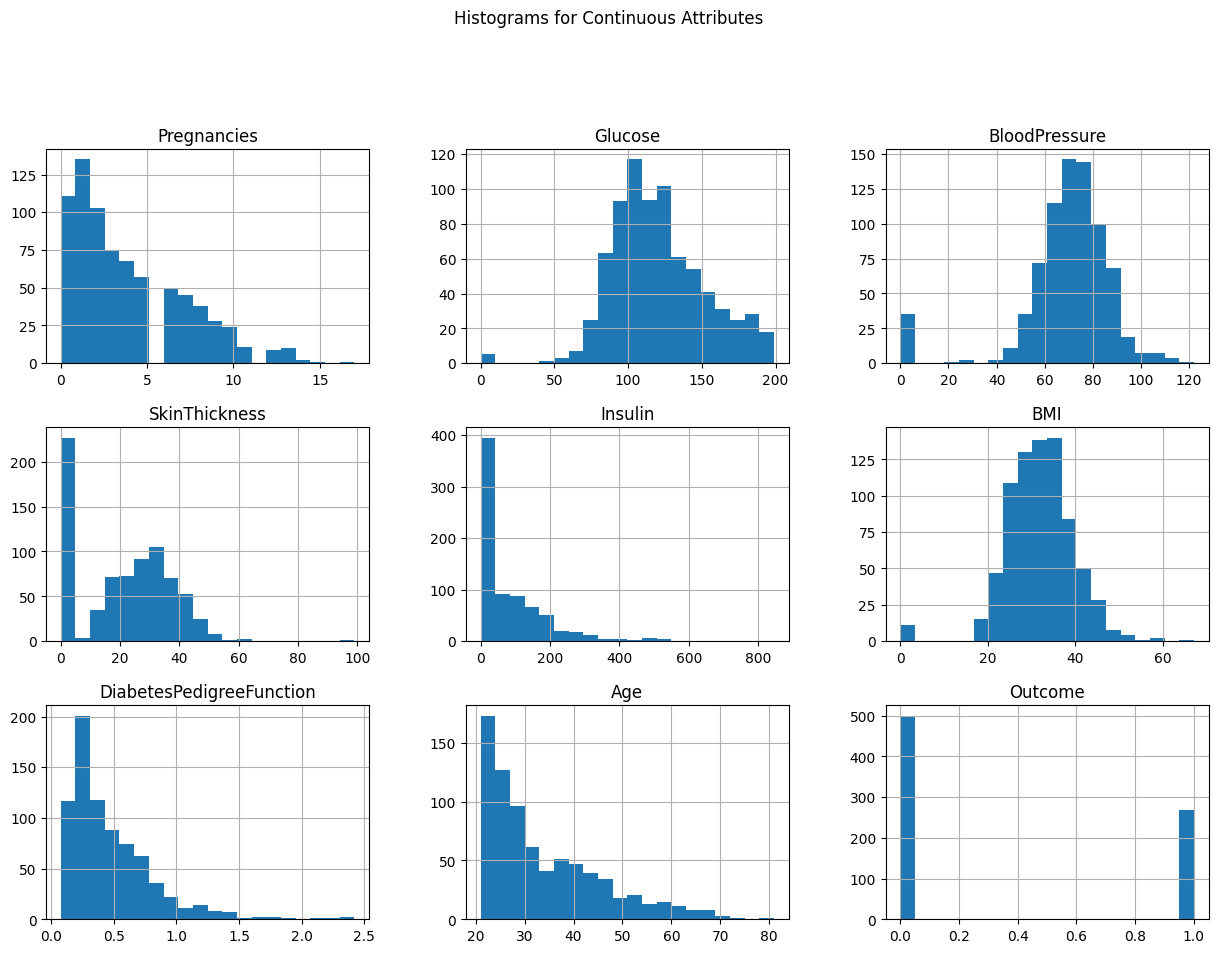

In [7]:
# Create histograms for continuous attributes
df[continuous_attributes].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms for Continuous Attributes", y=1.02)
plt.show()

In [8]:
correlation = df[continuous_attributes].corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [9]:
import seaborn as sns

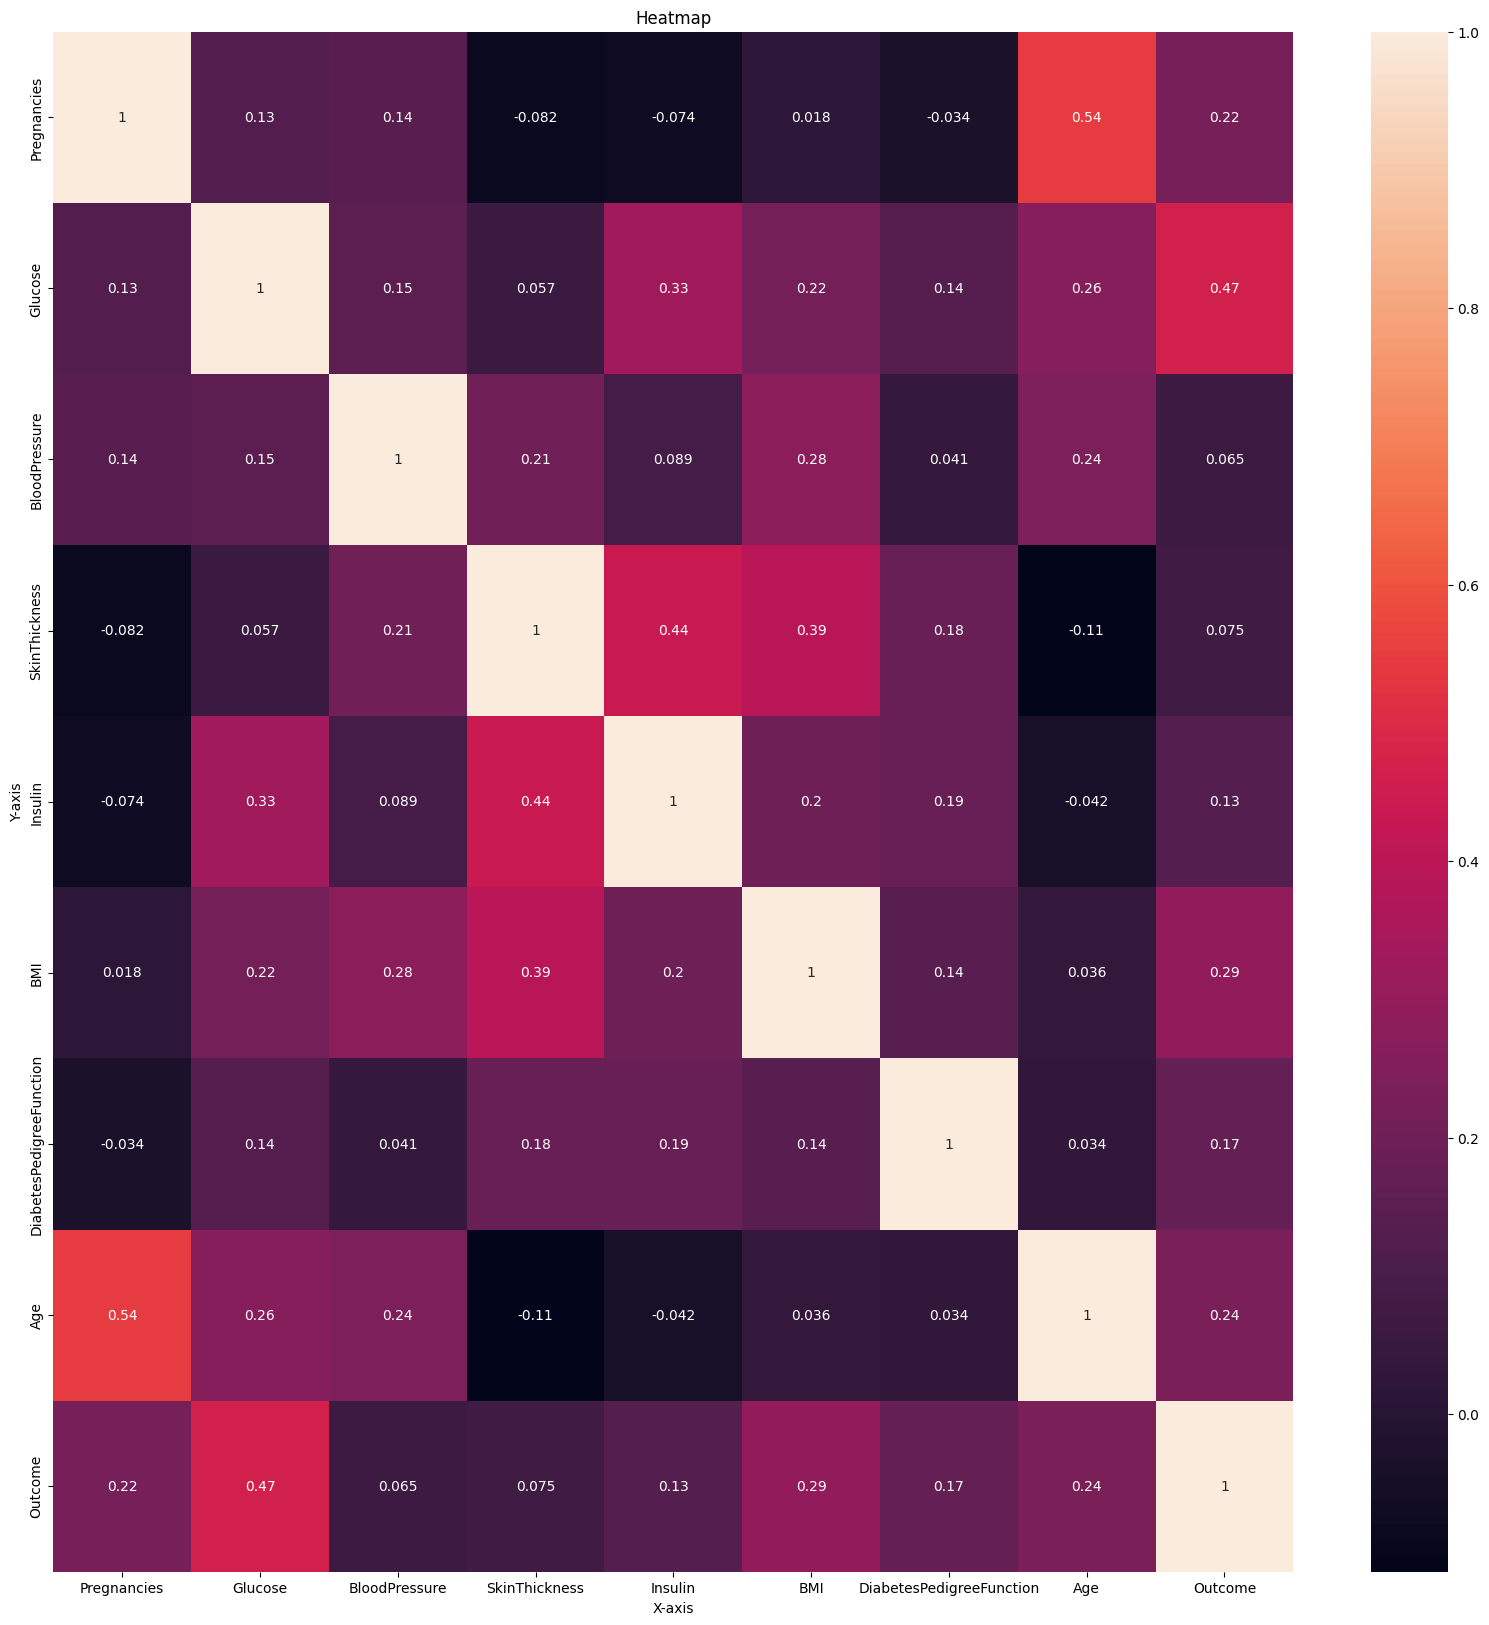

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True)
plt.title('Heatmap')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

As Observable from the heatmap the outcome is positively correlated to glucose , bmi and age. As glucose / obesity / age of a person increases the chances of diabities also increases and hence the positive correlation.

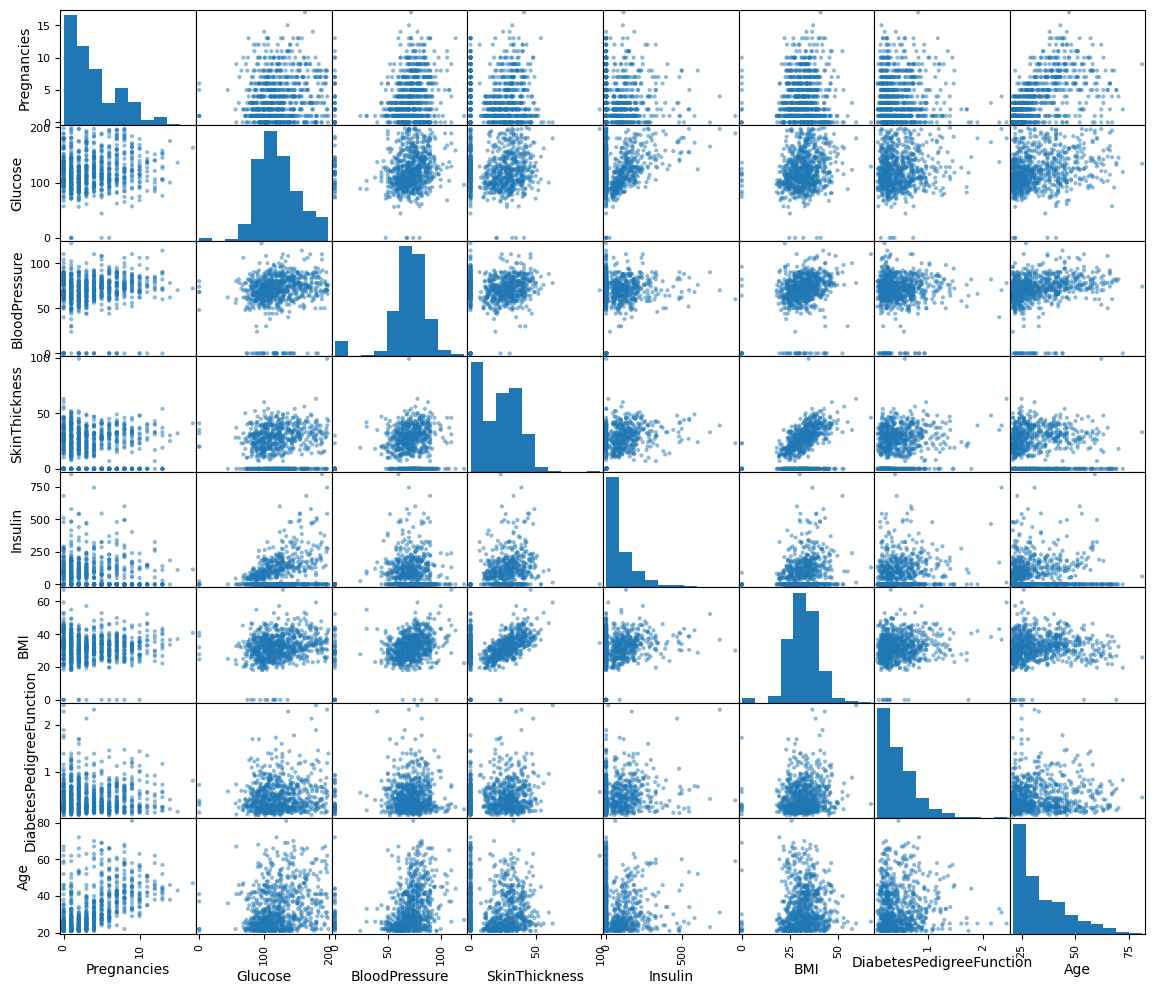

In [11]:
from pandas.plotting import scatter_matrix

# Define the attributes you want to include in the scatter matrix
attributes_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create the scatter matrix
scatter_matrix(df[attributes_to_plot], figsize=(14, 12))
plt.show()


splitting data to train and test


In [33]:
from sklearn.model_selection import train_test_split
Y =  df['Outcome']
x =  df.drop('Outcome' , axis = 1)
from sklearn.preprocessing import StandardScaler

# Assuming X contains your features
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X = scaler.fit_transform(x)

# Now, X_scaled contains your scaled features

# Assuming X contains your features and y contains your target variable
# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)




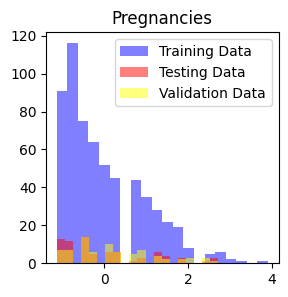

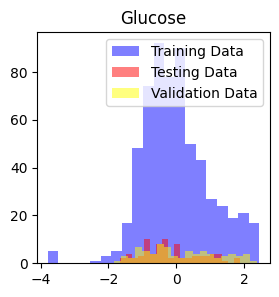

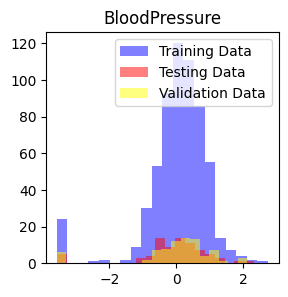

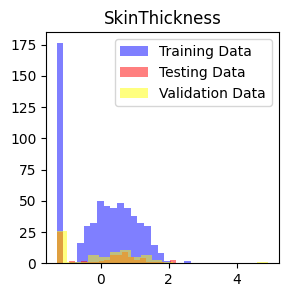

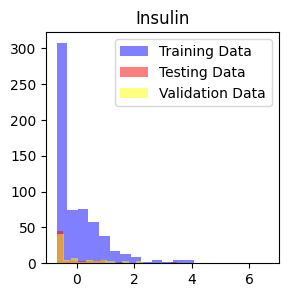

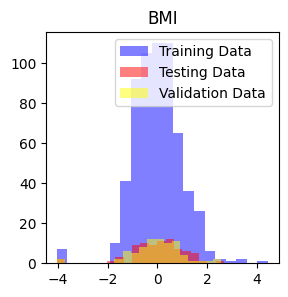

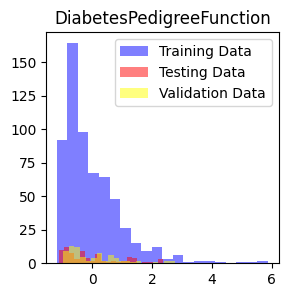

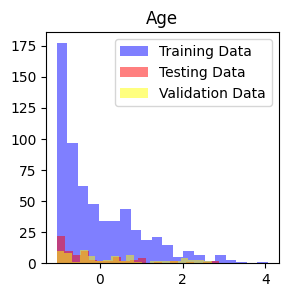

In [35]:
import matplotlib.pyplot as plt

# Assuming X_train and X_test contain your training and testing data respectively
# Plot histograms for each feature in the training data

for i in range(X_train.shape[1]):
    plt.figure(figsize=(3,3))
    #plt.subplot(2, 2, i+1)
    plt.hist(X_train[:, i], bins=20, color='blue', alpha=0.5, label='Training Data')
    plt.hist(X_test[:, i], bins=20, color='red', alpha=0.5, label='Testing Data')
    plt.hist(X_valid[:, i], bins=20, color='yellow', alpha=0.5, label='Validation Data')

    plt.title(attributes_to_plot[i])
    plt.legend()
    plt.show()
#plt.tight_layout()



The testing , training and validation data looks like accurate representation of actual data as whole. It can be said that the data has been split correctly:

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define hyperparameter values to explore
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize logistic regression model
logistic_reg_model = LogisticRegression(multi_class='multinomial')

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logistic_reg_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Reset warnings
warnings.resetwarnings()

# Display the best hyperparameters and model score
print("Best Parameters:", grid_search.best_params_)
print("Best Model Score on Validation Set:", grid_search.best_score_)


Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}
Best Model Score on Validation Set: 0.7655071304811408


In [38]:
best_model_lr = grid_search.best_estimator_

In [40]:
from sklearn.metrics import classification_report
report = classification_report(y_test, best_model_lr.predict(X_test), target_names=["Class 0", "Class 1"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.79      0.84      0.81        49
     Class 1       0.68      0.61      0.64        28

    accuracy                           0.75        77
   macro avg       0.73      0.72      0.73        77
weighted avg       0.75      0.75      0.75        77



In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define hyperparameter values to explore
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM classifier
svm_model = SVC()

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Reset warnings
warnings.resetwarnings()

# Display the best hyperparameters and model score
print("Best Parameters:", grid_search.best_params_)
print("Best Model Score on Validation Set:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Model Score on Validation Set: 0.7654671464747433


In [43]:
best_model_svm = grid_search.best_estimator_

In [44]:
from sklearn.metrics import classification_report
report = classification_report(y_test, best_model_svm.predict(X_test), target_names=["Class 0", "Class 1"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.75      0.90      0.81        49
     Class 1       0.72      0.46      0.57        28

    accuracy                           0.74        77
   macro avg       0.73      0.68      0.69        77
weighted avg       0.74      0.74      0.72        77



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter values to explore
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display the best hyperparameters and model score
print("Best Parameters:", grid_search.best_params_)
print("Best Model Score on Validation Set:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Score on Validation Set: 0.7883113421298148


In [47]:
best_model_rf = grid_search.best_estimator_

In [48]:
report = classification_report(y_test, best_model_svm.predict(X_test), target_names=["Class 0", "Class 1"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.75      0.90      0.81        49
     Class 1       0.72      0.46      0.57        28

    accuracy                           0.74        77
   macro avg       0.73      0.68      0.69        77
weighted avg       0.74      0.74      0.72        77



In [56]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize base models
reg_model = best_model_lr
svm_model = best_model_svm
rf_model = best_model_rf

# Define the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('logistic', reg_model),
    ('svm', svm_model),
    ('random_forest', rf_model)
], voting='hard')  # 'hard' voting for majority voting based on predicted class labels

# Train the ensemble model
ensemble_clf = ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)


Ensemble Model Accuracy: 0.7792207792207793


In [57]:
print("Ensemble Model Score on Train Set:", ensemble_clf.score(X_train, y_train))
print("Ensemble Model Score on Test Set:", ensemble_clf.score(X_test, y_test))
print("Ensemble Model Score on Validation Set:", ensemble_clf.score(X_valid, y_valid))

Ensemble Model Score on Train Set: 0.8469055374592834
Ensemble Model Score on Test Set: 0.7792207792207793
Ensemble Model Score on Validation Set: 0.7532467532467533


In [58]:
from sklearn.ensemble import StackingClassifier

# Define the estimators to be used in the stacking ensemble
estimators = [
    ("LogisticRegressor", best_model_lr),  # Replace with your best logistic regression model
    ("Random Forest Classifier", best_model_rf),  # Replace with your best random forest model
    ("SVM Classifier", best_model_svm),  # Replace with your best SVM model
]

# Create the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=best_model_rf  # You can replace this with your choice of a final estimator
)

# Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Print the ensemble model scores
print("Stacking Classifier Score on Train Set:", stacking_clf.score(X_train, y_train))
print("Stacking Classifier Score on Test Set:", stacking_clf.score(X_test, y_test))
print("Stacking Classifier Score on Validation Set:", stacking_clf.score(X_valid, y_valid))

Stacking Classifier Score on Train Set: 0.9218241042345277
Stacking Classifier Score on Test Set: 0.7532467532467533
Stacking Classifier Score on Validation Set: 0.7012987012987013
